In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("DI Yogyakarta.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       303 non-null    float64       
 2   Tx       306 non-null    float64       
 3   Tavg     305 non-null    float64       
 4   RH_avg   305 non-null    float64       
 5   RR       240 non-null    float64       
 6   ss       306 non-null    float64       
 7   ff_x     310 non-null    float64       
 8   ddd_x    310 non-null    float64       
 9   ff_avg   310 non-null    float64       
 10  ddd_car  311 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-e5c09a6de12e>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.7,30.9,27.2,26.9
1,2023-02-01,24.2,29.2,0.6,27.2
2,2023-03-01,25.3,29.2,3.2,27.2
3,2023-04-01,24.4,30.2,9.4,27.6
4,2023-05-01,22.4,29.6,18.2,27.0
...,...,...,...,...,...
309,2023-10-28,23.4,30.4,NaN,27.8
310,2023-10-29,24.4,30.0,NaN,27.5
311,2023-10-30,24.7,31.0,0.0,27.9
312,2023-10-31,25.6,30.7,0.0,28.0


In [4]:
# cek duplikat
df1.duplicated().sum()

9

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.7,30.9,27.2,26.9
1,31,31,2023-01-02,23.1,29.1,37.2,26.0
2,59,60,2023-01-03,24.1,29.0,0.4,26.3
3,90,92,2023-01-04,23.6,31.2,2.0,26.3
4,120,123,2023-01-05,24.1,31.0,NaN,27.7
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,23.5,29.4,0.0,26.2
301,192,198,2023-12-07,19.6,28.0,NaN,23.3
302,223,230,2023-12-08,18.9,27.2,0.0,23.0
303,254,262,2023-12-09,22.7,28.4,0.0,25.3


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         11
Tx          8
RR         71
Tavg        9
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

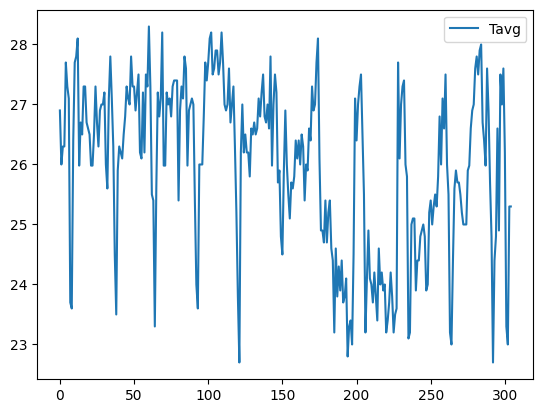

In [10]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

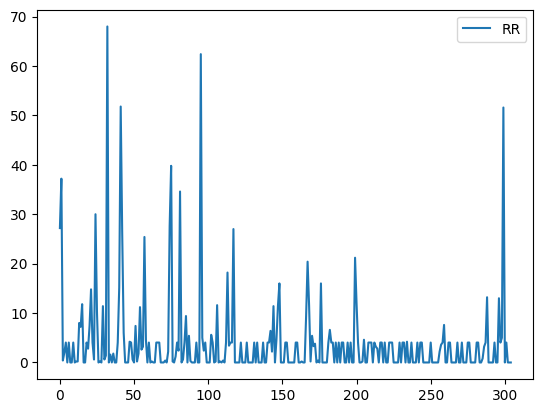

In [11]:
#plotting tavg
df1[['RR']].plot()

In [12]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.7,30.9,27.200000,26.9,29.1,26.0,37.200000
1,31,31,2023-01-02,23.1,29.1,37.200000,26.0,29.0,26.3,0.400000
2,59,60,2023-01-03,24.1,29.0,0.400000,26.3,31.2,26.3,2.000000
3,90,92,2023-01-04,23.6,31.2,2.000000,26.3,31.0,27.7,4.034188
4,120,123,2023-01-05,24.1,31.0,4.034188,27.7,31.0,27.3,0.000000
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,23.5,29.4,0.000000,26.2,28.0,23.3,4.034188
301,192,198,2023-12-07,19.6,28.0,4.034188,23.3,27.2,23.0,0.000000
302,223,230,2023-12-08,18.9,27.2,0.000000,23.0,28.4,25.3,0.000000
303,254,262,2023-12-09,22.7,28.4,0.000000,25.3,28.8,25.3,0.000000


In [13]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,27.200000,26.9,26.0,37.200000
1,37.200000,26.0,26.3,0.400000
2,0.400000,26.3,26.3,2.000000
3,2.000000,26.3,27.7,4.034188
4,4.034188,27.7,27.3,0.000000
...,...,...,...,...
300,0.000000,26.2,23.3,4.034188
301,4.034188,23.3,23.0,0.000000
302,0.000000,23.0,25.3,0.000000
303,0.000000,25.3,25.3,0.000000


In [14]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,27.200000,26.9,26.0,37.200000
1,37.200000,26.0,26.3,0.400000
2,0.400000,26.3,26.3,2.000000
3,2.000000,26.3,27.7,4.034188
4,4.034188,27.7,27.3,0.000000
...,...,...,...,...
299,51.600000,27.6,26.2,0.000000
300,0.000000,26.2,23.3,4.034188
301,4.034188,23.3,23.0,0.000000
302,0.000000,23.0,25.3,0.000000


In [15]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,27.200000,26.9,26.0,37.200000,0
1,37.200000,26.0,26.3,0.400000,1
2,0.400000,26.3,26.3,2.000000,2
3,2.000000,26.3,27.7,4.034188,3
4,4.034188,27.7,27.3,0.000000,4
...,...,...,...,...,...
299,51.600000,27.6,26.2,0.000000,299
300,0.000000,26.2,23.3,4.034188,300
301,4.034188,23.3,23.0,0.000000,301
302,0.000000,23.0,25.3,0.000000,302


In [17]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['Tavg']
y1 = df1["pta"]

X2 = df1['RR']
y2 = df1["ptr"]

X3 = df1['Indeks']
y3 = df1["RR"]

In [18]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [19]:
X_train = np.array(X_train).reshape(-1, 1)

In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([25.08137853, 25.15823175, 25.23508497, 25.08137853, 24.38969954,
       24.46655276, 25.38879141, 25.54249785, 25.23508497, 25.46564463,
       25.61935107, 25.46564463, 25.84991074, 26.61844295, 26.00361718,
       26.84900261, 26.46473651, 27.1564155 , 26.00361718, 25.61935107,
       23.85172699, 23.69802055, 24.77396564, 25.6962043 , 25.92676396,
       25.77305752, 25.77305752, 25.61935107, 25.38879141, 25.23508497,
       25.23508497, 25.23508497, 25.92676396, 25.98933702, 26.46473651,
       26.69529617, 26.77214939, 27.23326872, 27.38697516, 27.1564155 ,
       27.46382838, 27.5406816 , 26.54158973, 26.31103006, 25.98933702,
       27.23326872, 26.69529617, 25.77305752, 25.08137853, 23.46746088,
       24.77396564, 25.08137853, 26.46473651, 25.15823175, 27.1564155 ,
       26.77214939, 27.23326872, 26.15732362, 23.92858021, 23.69802055,
       25.46564463])

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.7092962069209163

In [23]:
X_test['Indeks'] = X_test.index
X_test

243                                                    24.8
244                                                    24.9
245                                                    25.0
246                                                    24.8
247                                                    23.9
                                ...                        
300                                                    26.2
301                                                    23.3
302                                                    23.0
303                                                    25.3
Indeks    Int64Index([243, 244, 245, 246, 247, 248, 249,...
Name: Tavg, Length: 62, dtype: object

In [24]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
243,25.081379
244,25.158232
245,25.235085
246,25.081379
247,24.389700
...,...
299,27.233269
300,26.157324
301,23.928580
302,23.698021


In [25]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-25-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,26.9,NaN
1,26.0,NaN
2,26.3,NaN
3,26.3,NaN
4,27.7,NaN
...,...,...
299,27.6,27.233269
300,26.2,26.157324
301,23.3,23.928580
302,23.0,23.698021


<Axes: >

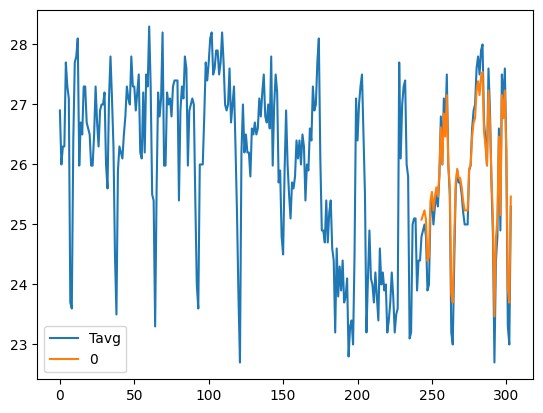

In [26]:
kan.plot()

In [27]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([ 6.02177969,  6.7903119 ,  7.55884411,  8.32737632,  9.09590854,
        9.86444075, 10.63297296])

In [28]:
kan.to_json('prediksi_DI Yogyakarta')